In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc58f1208c5ed7ff3802a8f96bf43fd


In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=250)
lngs = np.random.uniform(low=-180.000, high=180.000, size=250)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

178

In [ ]:
# THIS IS ONE WAY TO WRITE THE CODE. THE NEXT CELL IS MORE CONSISCE
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | eirunepe
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | lorengau
Processing Record 5 of Set 1 | provideniya
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | noumea
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | tarko-sale
Processing Record 12 of Set 1 | portoferraio
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 15 of Set 1 | sao filipe
Processing Record 16 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | okhotsk
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 | rungata
City not found. Skipping...

In [9]:
len(city_data)

155

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Eirunepe,-6.6603,-69.8736,83.01,66,91,4.05,BR,2023-01-24 19:20:30
1,Punta Arenas,-53.1500,-70.9167,53.71,40,40,29.93,CL,2023-01-24 19:16:13
2,Rikitea,-23.1203,-134.9692,79.09,73,42,17.74,PF,2023-01-24 19:16:09
3,Lorengau,-2.0226,147.2712,77.99,81,100,2.44,PG,2023-01-24 19:20:30
4,Provideniya,64.3833,-173.3000,-4.14,83,1,14.43,RU,2023-01-24 19:20:31
5,Hilo,19.7297,-155.0900,79.29,81,75,6.91,US,2023-01-24 19:20:31
6,Hobart,-42.8794,147.3294,61.05,92,20,6.91,AU,2023-01-24 19:13:40
7,Noumea,-22.2763,166.4572,81.00,99,0,2.77,NC,2023-01-24 19:17:38
8,Barrow,71.2906,-156.7887,-9.38,77,0,17.27,US,2023-01-24 19:20:32
9,Tarko-Sale,64.9225,77.7850,-6.12,96,100,17.65,RU,2023-01-24 19:20:32


In [15]:
new_city_data_order = ["City", "Country", "Date", "Lat","Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
new_city_df = city_data_df[new_city_data_order]
new_city_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Eirunepe,BR,2023-01-24 19:20:30,-6.6603,-69.8736,83.01,66,91,4.05
1,Punta Arenas,CL,2023-01-24 19:16:13,-53.1500,-70.9167,53.71,40,40,29.93
2,Rikitea,PF,2023-01-24 19:16:09,-23.1203,-134.9692,79.09,73,42,17.74
3,Lorengau,PG,2023-01-24 19:20:30,-2.0226,147.2712,77.99,81,100,2.44
4,Provideniya,RU,2023-01-24 19:20:31,64.3833,-173.3000,-4.14,83,1,14.43
5,Hilo,US,2023-01-24 19:20:31,19.7297,-155.0900,79.29,81,75,6.91
6,Hobart,AU,2023-01-24 19:13:40,-42.8794,147.3294,61.05,92,20,6.91
7,Noumea,NC,2023-01-24 19:17:38,-22.2763,166.4572,81.00,99,0,2.77
8,Barrow,US,2023-01-24 19:20:32,71.2906,-156.7887,-9.38,77,0,17.27
9,Tarko-Sale,RU,2023-01-24 19:20:32,64.9225,77.7850,-6.12,96,100,17.65


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

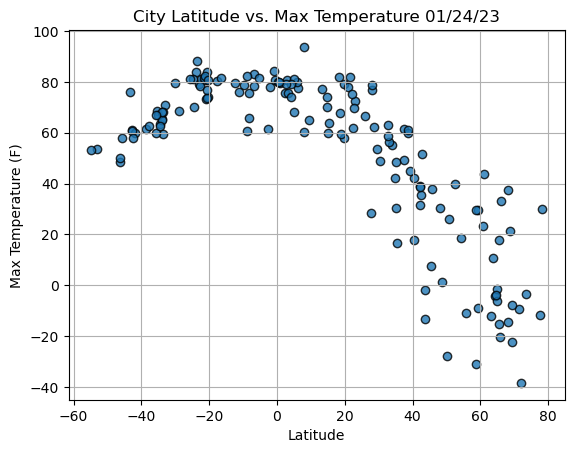

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

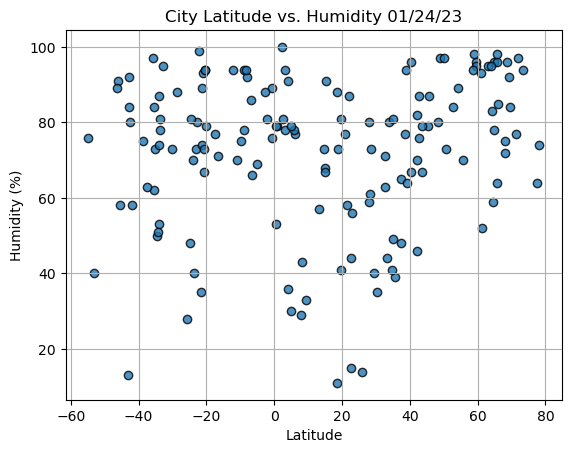

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

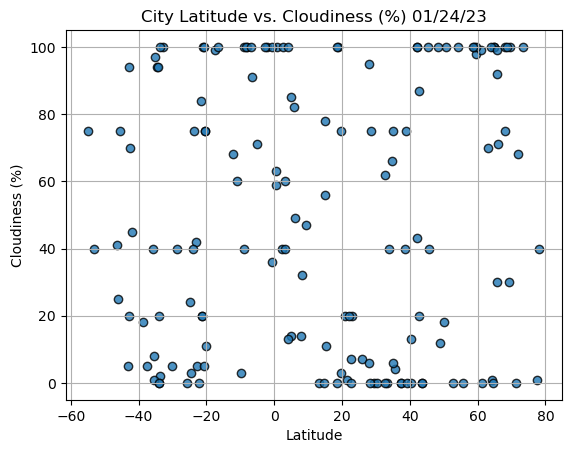

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

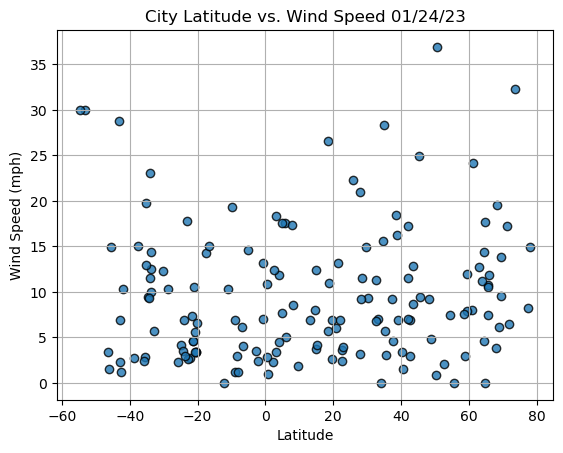

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()